<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

To demonstrate, we're going to build on the data we processed in `data` 

In [ ]:
image = np.loadtxt('example.txt')
profiles = np.loadtxt('example_profiles.txt')

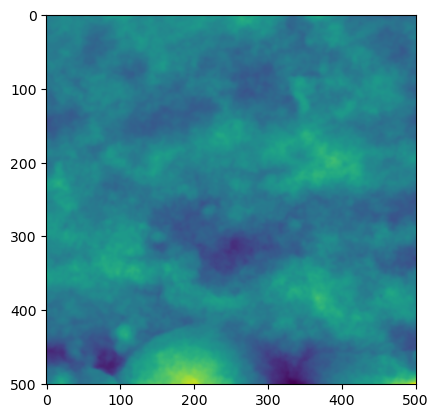

In [ ]:
plt.imshow(image)
plt.show()

## Statistical Parameters
The following methods are statistical in nature, providing a single number as a broad description of the distribution of the height values. 

In [1]:
#| echo: false
#| output: asis
show_doc(Ra)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L17){target="_blank" style="float:right; font-size:smaller"}

### Ra

>      Ra (im, axis=1, norm=True)

Calculates Mean Absolute Roughness (Ra) along given axis. Defined as the average deviation of absolute height values from the mean line.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or arraylike |
| axis | int | 1 | Default to Ra of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |

In [ ]:
Ra(image)[:5]

array([0.00042114, 0.0004146 , 0.00040444, 0.00039162, 0.00037649])

Remember, if you just want the parameters of a certain profile, you just index into your image and be mindful of the axis. 

In [ ]:
first_row_profile    = image[0,:]
first_column_profile = image[:,0]
Ra(first_column_profile, axis = 0)

0.00043905629459996097

In [2]:
#| echo: false
#| output: asis
show_doc(Rms)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L29){target="_blank" style="float:right; font-size:smaller"}

### Rms

>      Rms (im, axis=1, norm=True)

Calculates Root Mean Square Roughness (Rms) along given axis. Defined as the root mean square of deviations of height from the mean line of a given profile.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to Rms of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |

In [ ]:
Rms(image)[:5]

array([0.0005232 , 0.00051211, 0.00049625, 0.00047939, 0.00046217])

In [3]:
#| echo: false
#| output: asis
show_doc(Rsk)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L41){target="_blank" style="float:right; font-size:smaller"}

### Rsk

>      Rsk (im, axis=1, norm=True, **kwargs)

Calcultes the Skew (Rsk) along given axis. Thin wrapper around scipy.stats.skew with bias set to False

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to Skew of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

In [ ]:
Rsk(image)[:5]

array([-0.34102473, -0.34162509, -0.33785933, -0.32203996, -0.2844012 ])

In [4]:
#| echo: false
#| output: asis
show_doc(Rku)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L54){target="_blank" style="float:right; font-size:smaller"}

### Rku

>      Rku (im, axis=1, norm=True, **kwargs)

Calculates the Kurtosis (Rku) along given axis. This wrapper around scipy.stats.kurtosis

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to Kurtosis of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

In [ ]:
Rku(image)[:5]

array([-0.67518082, -0.7123575 , -0.75156931, -0.76424118, -0.74213074])

In [5]:
#| echo: false
#| output: asis
show_doc(Rp)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L67){target="_blank" style="float:right; font-size:smaller"}

### Rp

>      Rp (im, axis=1, norm=True, **kwargs)

Calculates the peak height of the profile.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to peaks of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

In [6]:
#| echo: false
#| output: asis
show_doc(Rv)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L82){target="_blank" style="float:right; font-size:smaller"}

### Rv

>      Rv (im, axis=1, norm=True, **kwargs)

Calculates the absolute max valley depth of the profile.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to peaks of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

In [7]:
#| echo: false
#| output: asis
show_doc(Rz)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L97){target="_blank" style="float:right; font-size:smaller"}

### Rz

>      Rz (im, axis=1, norm=True, **kwargs)

Calculates the maximum height (max height + absolute max depth) of the profile. Synonymous with range. 
Also called Rt

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to peaks of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

In [ ]:
## Texture Parameters

In [ ]:
def local_max_min(im,
                  axis = 1,
                  norm = True,
                  **kwargs
                 ):
    ''' 
    Returns the number of local maxima and minima per unit length, also known as the density of extremes from Nayak (1971).
    Assumes the surface is random, with a gaussian distribution of heights (usually pretty safe). 
    '''
    if norm:
        im = im - np.mean(im, axis = axis, keepdims = True)
    
    m2 = moment(im, moment=2, axis = axis)
    m4 = moment(im, moment=4, axis = axis)
    return (1/math.pi) * ((m4/m2)**(1/2))

In [ ]:
def Sds(im,
        axis = 1,
        norm = True,
        **kwargs
       ):
    '''
    Density of summits, as described by Nayak (1971).
    Assumes gaussian, isotropic surface. 
    '''
    m2 = moment(im, moment=2, axis = axis)
    m4 = moment(im, moment=4, axis = axis)
    
    return (1 / (6 * math.pi * (3**(1/2)))) * (m4/m2)